# Machine Learning - Clustering
## This Script include:
#### 1. Importing libraries and data 
#### 2. Data Cleaning
#### 3. The elbow technique
#### 4. k-means clustering
####    4.1 Visualization
####    4.2 Descriptive statistics and insights
#### 5. Key Points

# Import Libraries and Data 

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [6]:
# Import Data
path = r'/Users/amritkaur/Desktop/CF Data Immersion/Chapter 6/'
df = pd.read_csv(os.path.join(path, 'Task 6.4/us_retail_forecast.csv'))

/var/folders/b2/nhtg2py55bd6x9ky11p928r00000gn/T/ipykernel_67167/3274488819.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'Task 6.4/us_retail_forecast.csv'))


In [7]:
df.shape

(73100, 17)

## Data Cleaning

In [9]:
# Check for columns
df.columns

Index(['Unnamed: 0', 'Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'State'],
      dtype='object')

In [10]:
# drop unnecessary column i.e. 'Unnamed : 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'State'],
      dtype='object')

In [12]:
df.dtypes

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
State                  object
dtype: object

In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73095    False
73096    False
73097    False
73098    False
73099    False
Length: 73100, dtype: bool

In [14]:
# Create a dataframe of clean data
df_clean = df[df['State'].isnull() == False]

In [15]:
# Check for missing values in State column
df_clean['State'].isnull().sum()

0

In [16]:
# Check for missing value in cleaned data
df_clean.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
State                 0
dtype: int64

In [17]:
df_clean.shape

(9800, 16)

In [18]:
df_clean.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,State
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,Kentucky
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,Kentucky
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,California
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,Florida
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,Florida


In [19]:
# Create a subset that include only numeric value
retail_num = df_clean[['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Holiday/Promotion','Competitor Pricing']]

In [20]:
retail_num.head()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
0,231,127,55,135.47,33.50,20,0,29.69
1,204,150,66,144.04,63.01,20,0,66.16
2,102,65,51,74.02,27.99,10,1,31.32
3,469,61,164,62.18,32.72,10,1,34.74
4,166,14,135,9.26,73.64,0,0,68.95


In [21]:
retail_num.dtypes

Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Holiday/Promotion       int64
Competitor Pricing    float64
dtype: object

## The Elbow technique

In [23]:
# Defines the range of potential clusters and k-means clusters in the range assigned above.
num_cl = range(1, 10) 
inertia = []

for i in num_cl:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(retail_num)
    inertia.append(kmeans.inertia_)

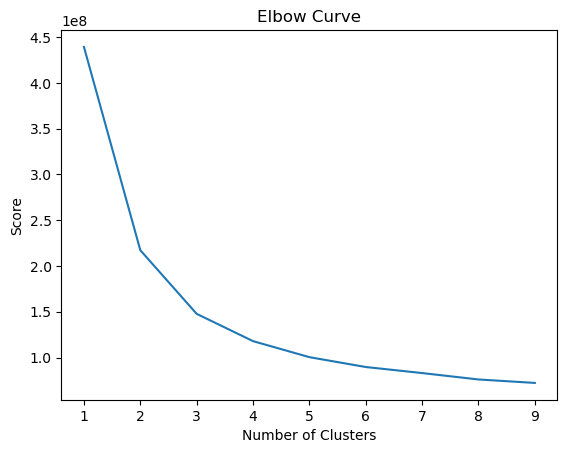

In [24]:
# Plot the scores to visualize the 'elbow'
pl.plot(num_cl,inertia)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The curve levels off around 4 clusters, suggesting diminishing returns in score improvement beyond this point. This indicates that 4 is the optimal number of clusters for this dataset.

## K-means Clustering

In [27]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 


In [28]:
# Fit the k-means object to the dataframe
kmeans.fit(retail_num)

KMeans(n_clusters=4)

In [29]:
# Create new column in dataframe to show the clusters
retail_num['clusters'] = kmeans.fit_predict(retail_num)
retail_num.head()

/var/folders/b2/nhtg2py55bd6x9ky11p928r00000gn/T/ipykernel_67167/2555450505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_num['clusters'] = kmeans.fit_predict(retail_num)


,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,clusters
0,231,127,55,135.47,33.50,20,0,29.69,2
1,204,150,66,144.04,63.01,20,0,66.16,2
2,102,65,51,74.02,27.99,10,1,31.32,1
3,469,61,164,62.18,32.72,10,1,34.74,3
4,166,14,135,9.26,73.64,0,0,68.95,1


In [30]:
retail_num.to_csv(os.path.join(path, 'Task 6.5', 'retail_cluster_updated.csv'))

In [31]:
retail_num['clusters'].value_counts()

clusters
1    3707
2    2158
3    2053
0    1882
Name: count, dtype: int64

### Visualization

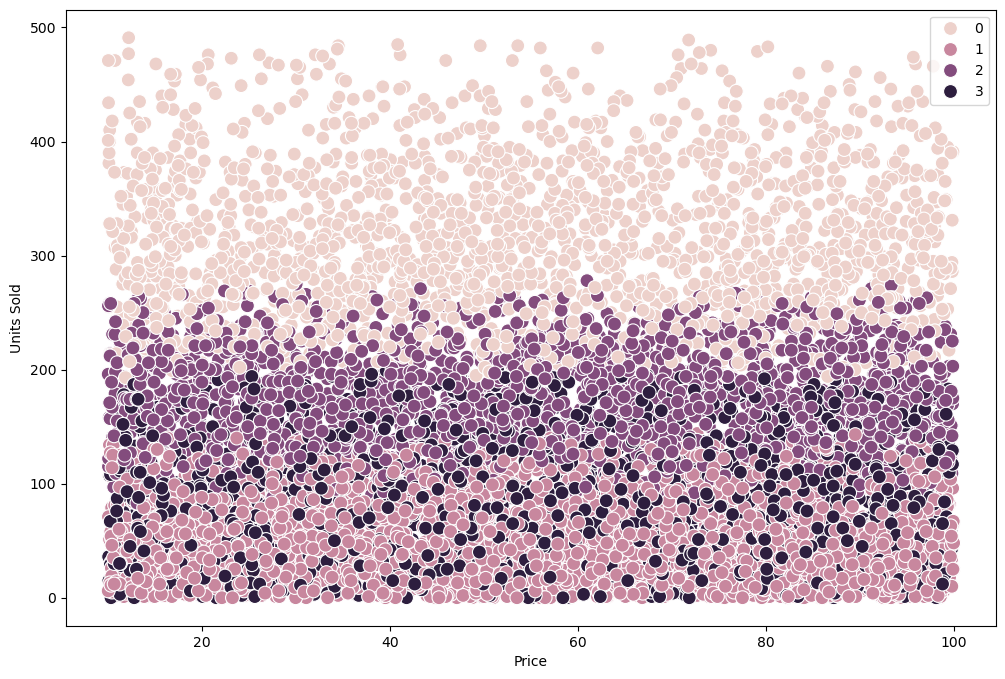

In [33]:
# Plot the clusters 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=retail_num['Price'], y=retail_num['Units Sold'], hue = kmeans.labels_, s=100)

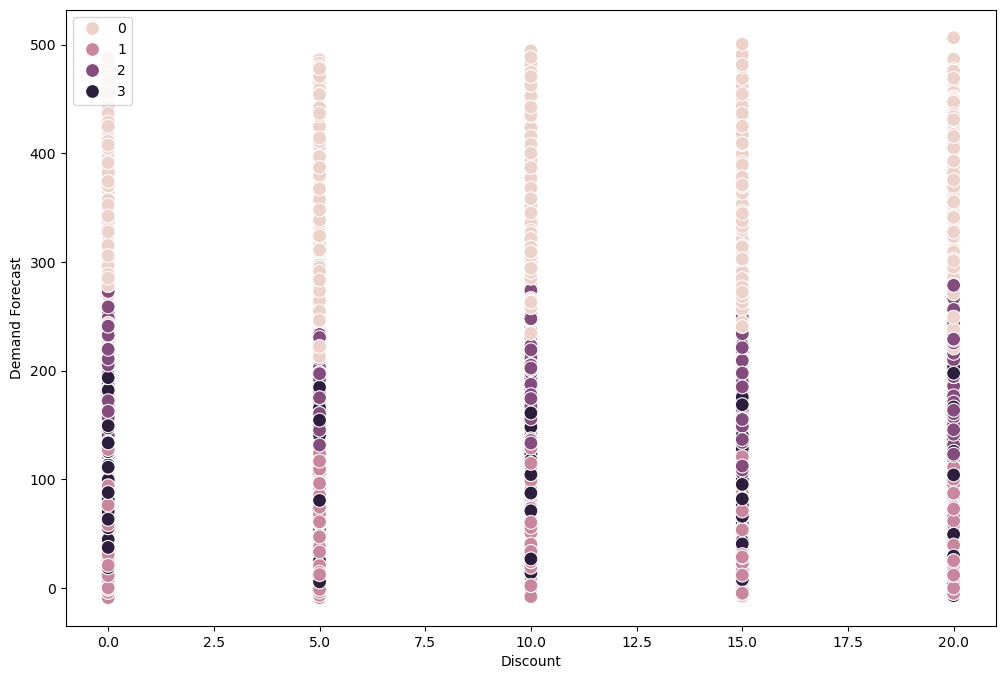

In [34]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=retail_num['Discount'], y=retail_num['Demand Forecast'], hue = kmeans.labels_, s=100)

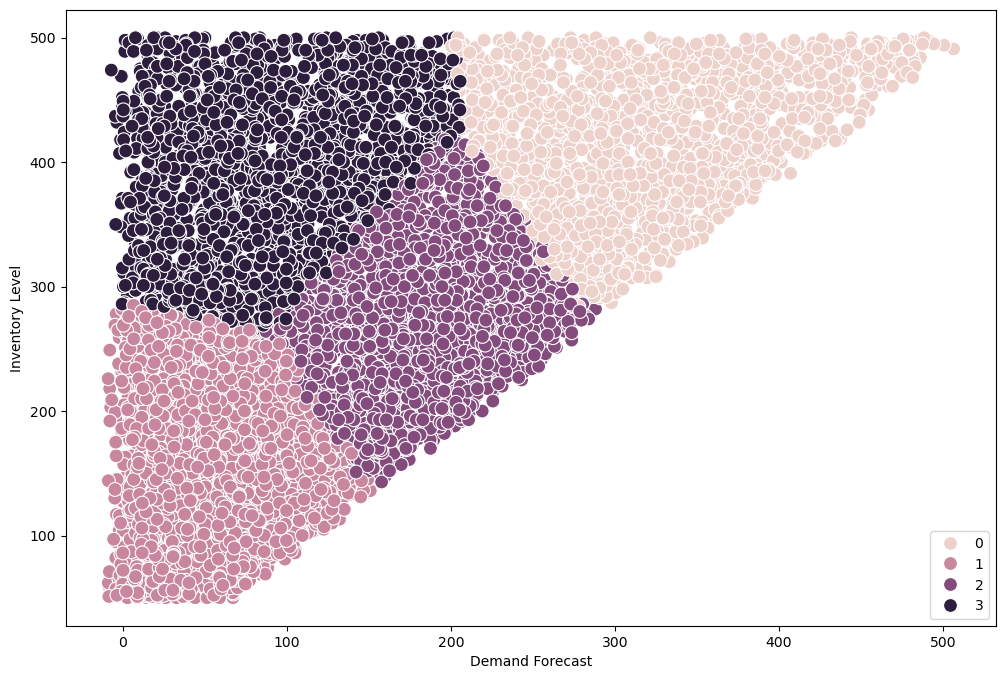

In [35]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=retail_num['Demand Forecast'], y=retail_num['Inventory Level'], hue = kmeans.labels_, s=100)

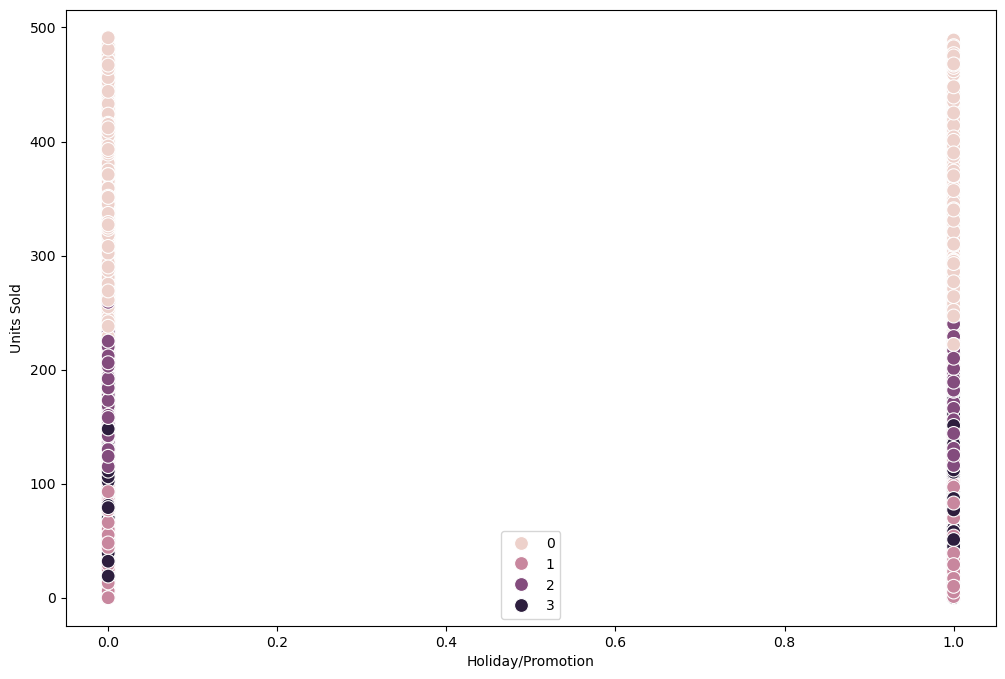

In [36]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=retail_num['Holiday/Promotion'], y=retail_num['Units Sold'], hue = kmeans.labels_, s=100)

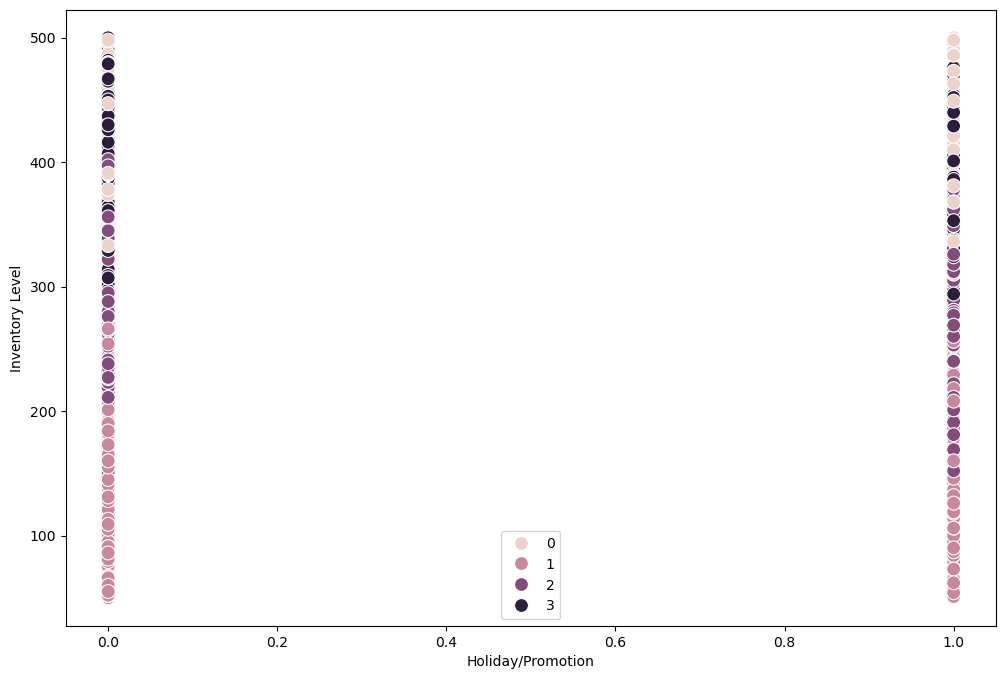

In [37]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=retail_num['Holiday/Promotion'], y=retail_num['Inventory Level'], hue = kmeans.labels_, s=100)

### Descriptive statistics and insights

In [39]:
# Calculate descriptive statistics for each cluster

retail_num.loc[retail_num['clusters'] == 3, 'clusters'] = 'dark purple'
retail_num.loc[retail_num['clusters'] == 2, 'clusters'] = 'purple'
retail_num.loc[retail_num['clusters'] == 1, 'clusters'] = 'light purple'
retail_num.loc[retail_num['clusters'] == 0, 'clusters'] = 'light pink'

retail_num.groupby('clusters').agg({
    'Inventory Level': ['mean', 'median'], 
    'Units Sold': ['mean', 'median'], 
    'Units Ordered': ['mean', 'median'], 
    'Price': ['mean', 'median'],
    'Discount': ['mean', 'median'],
    'Holiday/Promotion': ['mean', 'median'],
    'Demand Forecast': ['mean', 'median'],
    'Competitor Pricing': ['mean', 'median']
    })

/var/folders/b2/nhtg2py55bd6x9ky11p928r00000gn/T/ipykernel_67167/186802231.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  retail_num.loc[retail_num['clusters'] == 3, 'clusters'] = 'dark purple'


Inventory Level         Units Sold        Units Ordered         \
                        mean median        mean median          mean median   
clusters                                                                      
dark purple       393.625426  399.0   85.670726   82.0    110.142718  111.0   
light pink        414.974495  419.0  315.848565  307.0    110.619022  111.0   
light purple      141.711357  134.0   53.174804   50.0    111.141084  112.0   
purple            266.423540  264.0  175.294717  174.0    109.439296  109.0   

                  Price           Discount        Holiday/Promotion         \
                   mean  median       mean median              mean median   
clusters                                                                     
dark purple   54.992431  54.120   9.995129   10.0          0.490502    0.0   
light pink    54.962423  54.325  10.146121   10.0          0.494687    0.0   
light purple  55.470332  55.430   9.987861   10.0          0.496628    0.0   
purple        55.855602  55.505  10.308156   10.0          0.509731    1.0   

             Demand Forecast          Competitor Pricing          
                        mean   median               mean  median  
clusters                                                          
dark purple        90.649216   87.210          55.039430  54.010  
light pink        321.143539  311.505          54.970696  54.435  
light purple       58.076450   54.770          55.407386  55.450  
purple            180.943614  178.925          55.859096  55.225

In [74]:
# Export the data into project foder
retail_num.to_csv(os.path.join(path, 'Task 6.5', 'clustered.csv'))

### 1. Inventory & Sales Performance:
##### Light purple has the highest inventory level (422.23 mean, 428 median) and the highest units sold (334.30 mean, 326 median), indicating a strong demand and significant stock availability.
##### Dark purple follows with a moderate inventory (307.29 mean, 296 median) and a higher sales volume (192.53 mean, 189 median) compared to light pink and purple.
##### Light pink has a high inventory (381.85 mean, 385 median) but much lower sales (74.62 mean, 74 median), suggesting either low demand or potential overstocking.
##### Purple has the lowest inventory (143.39 mean, 139 median) and the lowest sales (59.07 mean, 54 median), indicating it is the least stocked and least sold category.
### 2. Pricing & Discounts:
##### Light purple and purple have the highest price points (~111 mean, 111-112 median), suggesting they may be premium or high-value items.
##### Dark purple has a slightly lower price (~109 mean, 110 median), making it more competitively priced.
##### Light pink has a similar pricing strategy to light purple (~110 mean, 111 median), despite its lower sales.
##### Discounts are minimal across clusters (~10 mean, 10 median), with slight variations.
### 3. Promotion & Demand Forecast:
##### Dark purple and purple have higher holiday/promotion values (0.50 mean, 1.0 median), indicating they are more likely to be on promotion.
##### Light purple and light pink have lower promotional activity (~0.49 to 0.48 mean, 0.0 median), potentially relying on organic demand rather than discounts.
##### Demand forecasts align with sales patterns: light purple has the highest demand forecast while purple has the lowest (~64.12 mean, 59.44 median).
### 4. Competitor Pricing:
##### Dark purple and purple have slightly higher competitor pricing (55.75 and 55.45 mean) than light pink and light purple (~55.03 and 54.83 mean), possibly reflecting market positioning differences.
### Key Points:
##### 1. Light purple is the best-performing cluster, with high inventory, high sales, and the highest demand forecast.
##### 2. Light pink is overstocked but has low sales, suggesting potential misalignment between pricing, demand, and promotions.
##### 3. Purple is the least stocked and least sold, indicating it may be a low-priority or niche product.

## Export the data

In [42]:
# Export the data into project foder
df_clean.to_csv(os.path.join(path, 'Task 6.5', 'df_cleaned_updated.csv'))